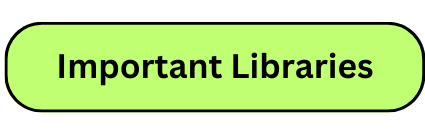

In [36]:
import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

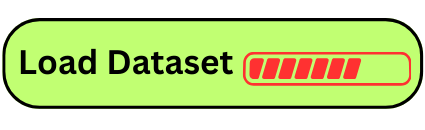

In [37]:
df=pd.read_csv('/content/spam_and_ham_classification.csv')


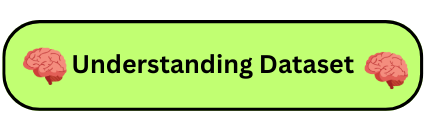

In [38]:
df.head(10)

,label,text
0,ham,into the kingdom of god and those that are ent...
1,spam,there was flow at hpl meter 1505 on april firs...
2,ham,take a look at this one campaign for bvyhprice...
3,spam,somu wrote actually thats what i was looking f...
4,spam,fathi boudra wrote i fixed the issue in the sv...
5,ham,categories company guidefood beverage your dad...
6,spam,alert name bush officers ex cia chief tenet a ...
7,spam,the vacation carry - over report is due to pay...
8,ham,"lncrease your sprm volume , and orgsm length\n..."
9,ham,respect hobby putting armpit farts portion con...


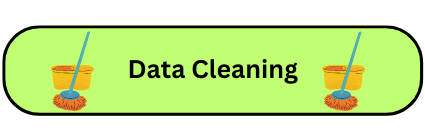

In [39]:
# Convert labels to 0 and 1
df['label'] = df['label'].map({'spam': 0, 'ham': 1})

In [40]:
df.head(10)

,label,text
0,1.0,into the kingdom of god and those that are ent...
1,0.0,there was flow at hpl meter 1505 on april firs...
2,1.0,take a look at this one campaign for bvyhprice...
3,0.0,somu wrote actually thats what i was looking f...
4,0.0,fathi boudra wrote i fixed the issue in the sv...
5,1.0,categories company guidefood beverage your dad...
6,0.0,alert name bush officers ex cia chief tenet a ...
7,0.0,the vacation carry - over report is due to pay...
8,1.0,"lncrease your sprm volume , and orgsm length\n..."
9,1.0,respect hobby putting armpit farts portion con...


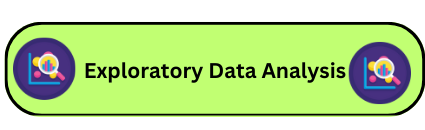

In [41]:
df.shape

(10018, 2)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10018 entries, 0 to 10017
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   9988 non-null   float64
 1   text    9992 non-null   object 
dtypes: float64(1), object(1)
memory usage: 156.7+ KB


In [43]:
df['label'] = df['label'].fillna(0)

In [44]:
df['label'] = df['label'].astype(int)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10018 entries, 0 to 10017
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   10018 non-null  int64 
 1   text    9992 non-null   object
dtypes: int64(1), object(1)
memory usage: 156.7+ KB


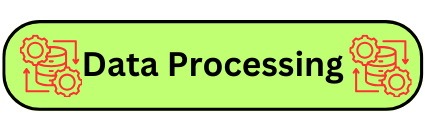

# Download necessary NLTK data

In [46]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Preprocessing functions
# Tokenization
 # Lowercasing
# Removing punctuation
# Stemming (using PorterStemmer)
# Join tokens back into a string
# Apply preprocessing to the text column

In [47]:
print(df['text'].apply(type).value_counts())


text
<class 'str'>      9992
<class 'float'>      26
Name: count, dtype: int64


In [48]:
df['text'] = df['text'].astype(str)
df['processed_text'] = df['text'].apply(preprocess_text)


In [49]:
df = df[df['text'].apply(lambda x: isinstance(x, str))]
df['processed_text'] = df['text'].apply(preprocess_text)


In [50]:

def preprocess_text(text):

    tokens = word_tokenize(text)


    tokens = [token.lower() for token in tokens]


    tokens = [token for token in tokens if token.isalnum()]


    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]


    return ' '.join(tokens)


df['processed_text'] = df['text'].apply(preprocess_text)

# Vectorization

In [51]:
tfidf = TfidfVectorizer(stop_words=stopwords.words('english'))
X = tfidf.fit_transform(df['processed_text'])
y = df['label']


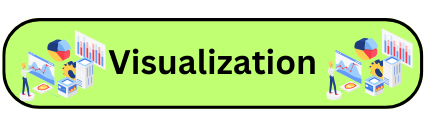

<ipython-input-53-f0e3e982ee40>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_names, y=label_counts, palette='viridis')


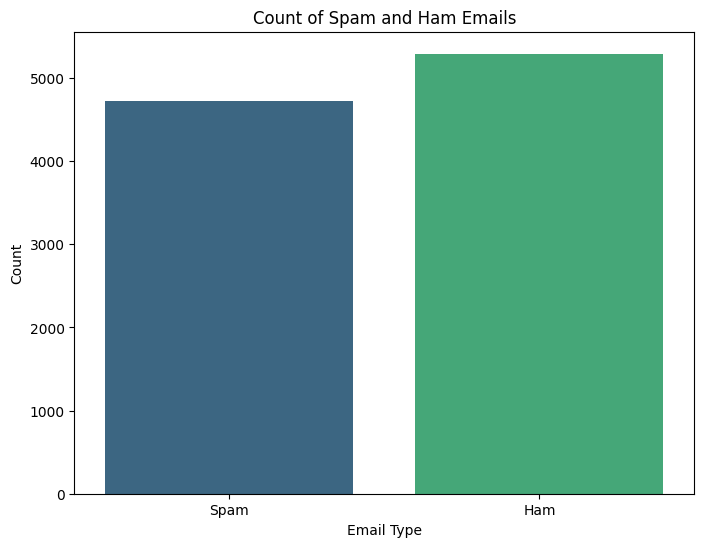

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
# Counting the number of spam and ham
label_counts = df['label'].value_counts().sort_index()
label_names = ['Spam', 'Ham']

# Plotting the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=label_names, y=label_counts, palette='viridis')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Count of Spam and Ham Emails')
plt.show()

# Split the data

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


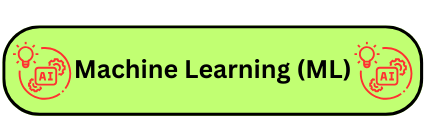

# Model training

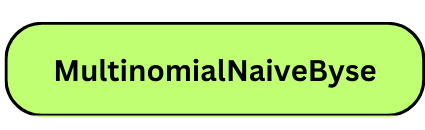

In [55]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [56]:
y_pred = model.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [59]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.96
Precision: 0.97
Recall: 0.95
F1 Score: 0.96


# Other Models

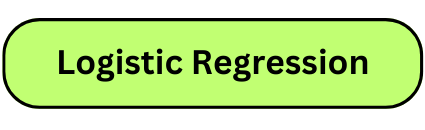

In [68]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Print the evaluation metrics
print(f'Logistic Regression Performance:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Logistic Regression Performance:
Accuracy: 0.96
Precision: 0.97
Recall: 0.95
F1 Score: 0.96


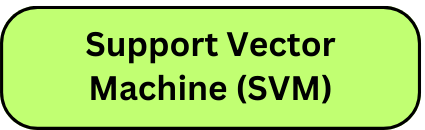

In [69]:
from sklearn.svm import SVC

# Define and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Support Vector Machine (SVM) Performance:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Support Vector Machine (SVM) Performance:
Accuracy: 0.98
Precision: 0.97
Recall: 0.99
F1 Score: 0.98


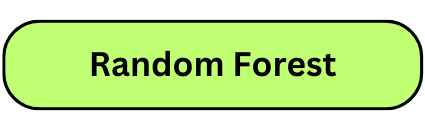

In [70]:
from sklearn.ensemble import RandomForestClassifier

# Define and train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Random Forest Performance:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Random Forest Performance:
Accuracy: 0.97
Precision: 0.97
Recall: 0.98
F1 Score: 0.98


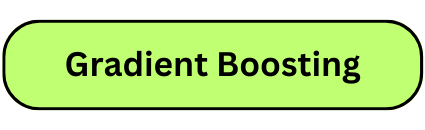

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

# Define and train the Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Gradient Boosting Performance:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Gradient Boosting Performance:
Accuracy: 0.95
Precision: 0.92
Recall: 0.98
F1 Score: 0.95


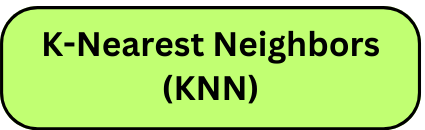

In [72]:
from sklearn.neighbors import KNeighborsClassifier

# Define and train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f'K-Nearest Neighbors (KNN) Performance:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


K-Nearest Neighbors (KNN) Performance:
Accuracy: 0.70
Precision: 0.64
Recall: 0.99
F1 Score: 0.78


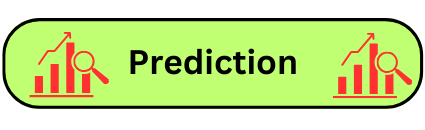

In [76]:
# Text to be predicted
new_text = input('''Put Email Here:''')

# Preprocess the new text
processed_text = preprocess_text(new_text)

# Transform the processed text using TF-IDF vectorization
X_new = tfidf.transform([processed_text])

# Define models and their names
models = [model,svm_model, rf_model, gb_model, knn_model]
model_names = ["MultinomialNaveBayes","Support Vector Machine (SVM)", "Random Forest", "Gradient Boosting", "K-Nearest Neighbors (KNN)"]

# Iterate through each model
for model, model_name in zip(models, model_names):
    # Make prediction
    prediction = model.predict(X_new)

    # Print the prediction
    if prediction[0] == 0:
        print(f"{model_name} Predicted label: spam")
    else:
        print(f"{model_name} Predicted label: ham")


Put Email Here:Hi friends,  Exciting heads up. In 3 days (June 1st) we are launching our brand new one of a kind 7 Backend Keywords Tool. We are soooo pumped for you to finally see it and use it. Yay. The launch is going to be an awesome deal. We are going to give a 50% discount for anyone that gets it right away. Wow what a deal! :)   This tool will also work really well with our Titans Pro, Titans Retro View and Titans Deep View. If you do not have those yet, take a look here: https://selfpublishingtitans.com/shop  Thanks to all for all your support and love. 
MultinomialNaveBayes Predicted label: ham
Support Vector Machine (SVM) Predicted label: ham
Random Forest Predicted label: ham
Gradient Boosting Predicted label: ham
K-Nearest Neighbors (KNN) Predicted label: ham


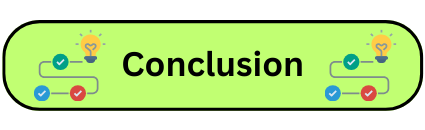

In the classification task for spam and ham email detection, five machine learning models were evaluated:
**Multinomial Naive Bayes,
Logistic Regression,
Support Vector Machine (SVM)
Random Forest
Gradient Boosting
K-Nearest Neighbors (KNN)**
Overall, the models performed well in terms of accuracy, with SVM achieving the highest accuracy of 98%, closely followed by Logistic Regression and Random Forest with 96% accuracy each. SVM also demonstrated the highest precision and F1 score among the models, indicating its effectiveness in correctly identifying spam emails while minimizing false positives. However, it's important to note that KNN exhibited lower performance compared to the other models, with an accuracy of 70%, suggesting it may not be the most suitable choice for this specific task. Overall, SVM emerges as the most promising model for spam and ham email classification, considering its high accuracy, precision, recall, and F1 score.

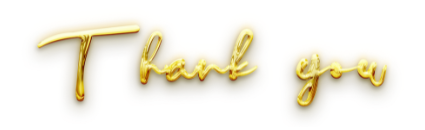